In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19435 entries, 0 to 19434
Columns: 114 entries, HOSPNUM to DEAD
dtypes: float64(16), int64(30), object(68)
memory usage: 17.1+ MB


In [4]:
#df.head()

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

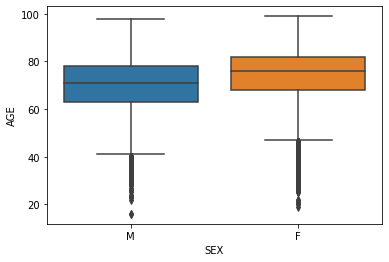

In [4]:
sns.boxplot(x = df.SEX, y = df.AGE)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

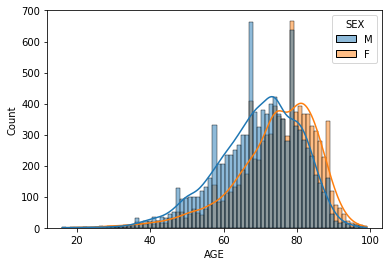

In [5]:
sns.histplot(x=df.AGE, kde=True, hue = df.SEX)

<AxesSubplot:xlabel='RATRIAL', ylabel='AGE'>

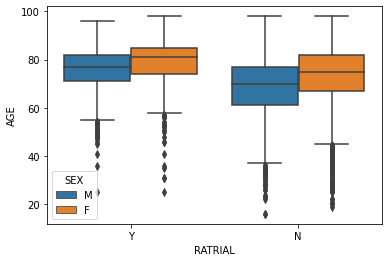

In [6]:
sns.boxplot(x = df.RATRIAL.sort_values(ascending=False), y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='RATRIAL', ylabel='count'>

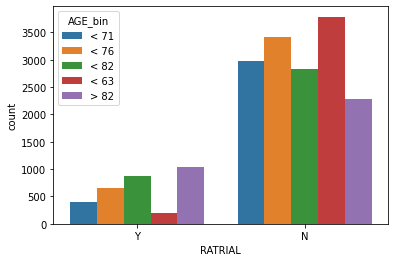

In [7]:
sns.countplot(x = df.RATRIAL.sort_values(ascending=False), hue = df.AGE_bin)

<AxesSubplot:xlabel='RVISINF', ylabel='count'>

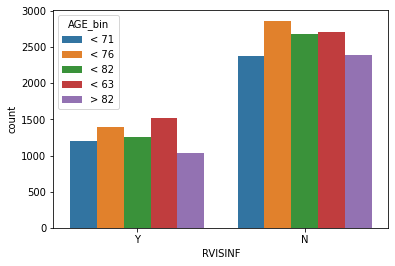

In [9]:
sns.countplot(x=df.RVISINF.sort_values(ascending=False), hue = df.AGE_bin)
# plot by sex

<AxesSubplot:xlabel='RHEP24', ylabel='count'>

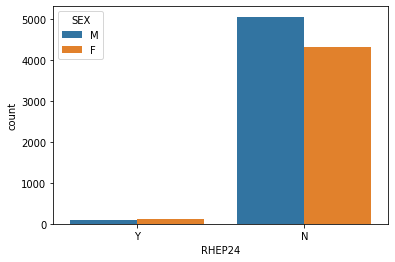

In [49]:
sns.countplot(x=df.RHEP24.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RASP3', ylabel='count'>

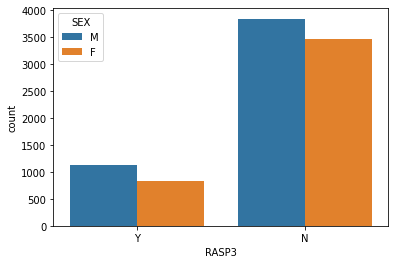

In [50]:
sns.countplot(x=df.RASP3.sort_values(ascending=False), hue = df.SEX)

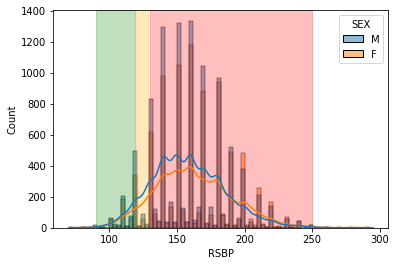

In [10]:
sns.histplot(x=df.RSBP, kde = True,  hue = df.SEX)
plt.axvspan(90, 119,alpha = 0.25, color = 'green')
plt.axvspan(120, 129,alpha = 0.25, color ='orange')
plt.axvspan(130, 250,alpha = 0.25, color ='red')

# https://www.cdc.gov/bloodpressure/about.htm
# normal: less than 120 mm Hg
# at risk (pre hypertension): 120–129 mm Hg
# hypertension: 130 mm Hg or higher

<AxesSubplot:xlabel='RDEF1', ylabel='count'>

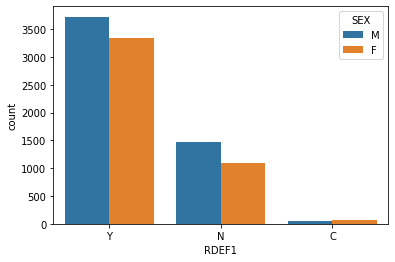

In [51]:
sns.countplot(x=df.RDEF1.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF1', ylabel='count'>

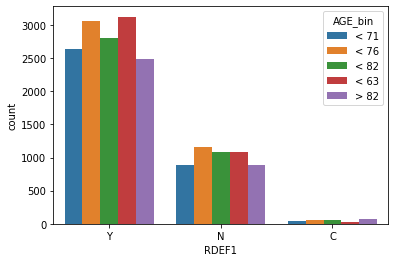

In [11]:
sns.countplot(x = df.RDEF1.sort_values(ascending=False), hue = df.AGE_bin)

In [13]:
#sns.catplot(x = df.RDEF1.sort_values(ascending=False).notnull(), hue = df.AGE_bin.notnull(), kind = 'count')

<AxesSubplot:xlabel='RDEF2', ylabel='count'>

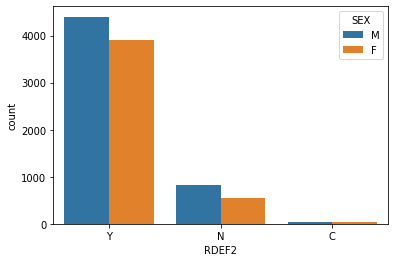

In [52]:
sns.countplot(x=df.RDEF2.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF3', ylabel='count'>

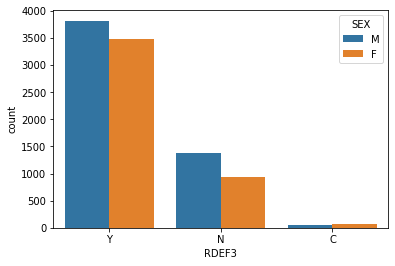

In [53]:
sns.countplot(x=df.RDEF3.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF4', ylabel='count'>

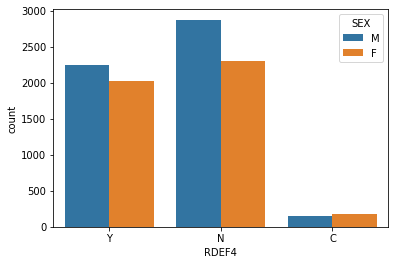

In [54]:
sns.countplot(x=df.RDEF4.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF5', ylabel='count'>

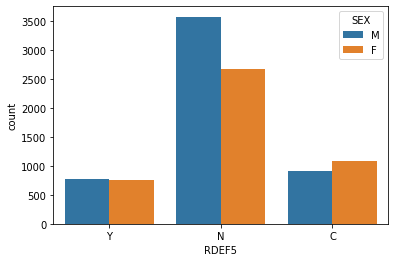

In [55]:
sns.countplot(x=df.RDEF5.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF6', ylabel='count'>

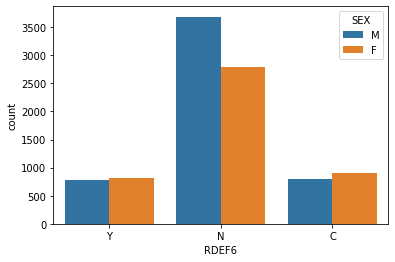

In [56]:
sns.countplot(x=df.RDEF6.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF7', ylabel='count'>

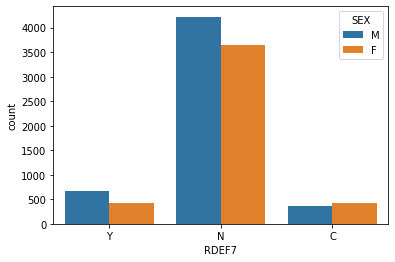

In [57]:
sns.countplot(x=df.RDEF7.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RDEF8', ylabel='count'>

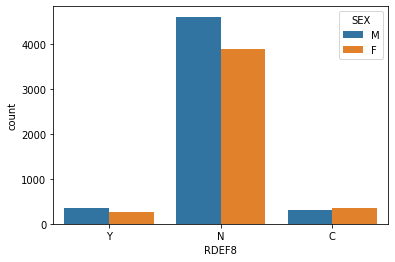

In [58]:
sns.countplot(x=df.RDEF8.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='STYPE', ylabel='count'>

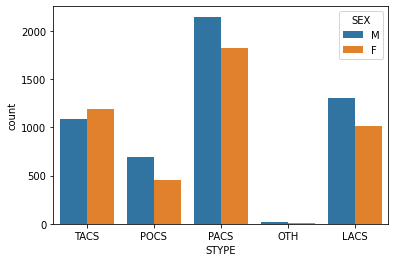

In [40]:
sns.countplot(x=df.STYPE.sort_values(ascending=False), hue = df.SEX)

<ipython-input-41-b8589685a264>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


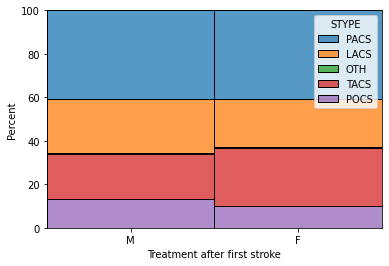

In [41]:
ax = sns.histplot(x = df.SEX.sort_values(),
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
#ax.set(xlabel="Sex")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [53]:
pd.pivot_table(df, values='DDEAD', index=['STYPE'], columns=['SEX'], aggfunc= np.sum)



SEX                                                          F  \
STYPE                                                            
LACS  DDEAD  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYNNNNNN...   
OTH   DDEAD                                      NNNNNNNNNNNNN   
POCS  DDEAD  NNNNNNNNNNYNNNNNNNNNNNNNNNYNNNNNYNNNNNNNNYNNNN...   

SEX                          M  
STYPE                           
LACS  DDEAD                NaN  
OTH   DDEAD  NNNNNNNYYNNNNNNNN  
POCS  DDEAD                NaN

In [82]:
group_f_ddead = df.query('SEX == "F"').groupby('DDEAD')
group_f_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     1633
       LACS      981
       TACS      925
       POCS      400
       OTH        13
Y      TACS      270
       PACS      190
       POCS       54
       LACS       31
Name: STYPE, dtype: int64

In [83]:
group_m_ddead = df.query('SEX == "M"').groupby('DDEAD')
group_m_ddead['STYPE'].value_counts()

DDEAD  STYPE
N      PACS     1966
       LACS     1270
       TACS      846
       POCS      634
       OTH        15
U      LACS        1
       TACS        1
Y      TACS      242
       PACS      183
       POCS       63
       LACS       33
       OTH         2
Name: STYPE, dtype: int64

In [49]:
pd.pivot_table(df, values='FDEAD', index=['STYPE'], columns=['SEX'], aggfunc= np.sum)

SEX                                                          F  \
STYPE                                                            
OTH   FDEAD                                      NNYYNNNNNNNNN   
POCS  FDEAD  NNNNNNNNNNYNNNNNNNNYNNNNNNYNNNNNYNNNNNNNNYNNNN...   
TACS  FDEAD                                                NaN   

SEX                                                          M  
STYPE                                                           
OTH   FDEAD                                  NNNNNNNYYNNNNNNNN  
POCS  FDEAD  NYNNNNNYNNNNNNNNNNYNNNNNNNNNNNNNNYYNYNNYNNNNNN...  
TACS  FDEAD  YNYYYNNYNYNYYYNNYNYYNYNNYYNYNNNYYNYNNYNNYNNNYN...

<AxesSubplot:xlabel='RXASP', ylabel='count'>

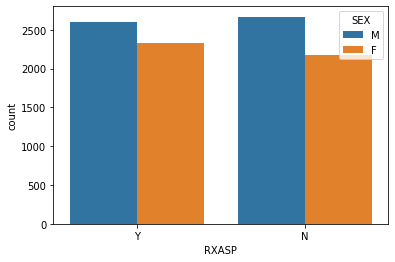

In [63]:
sns.countplot(x=df.RXASP.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='RXHEP', ylabel='count'>

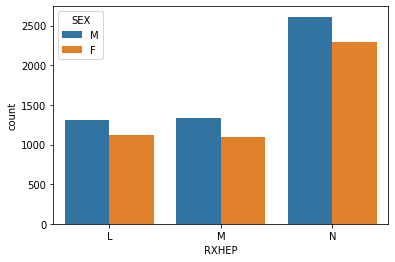

In [67]:
sns.countplot(x=df.RXHEP.sort_values(), hue = df.SEX)

In [ ]:
sns.countplot(x=df.RXHEP.sort_values(), hue = df.SEX)

<AxesSubplot:xlabel='RYEAR', ylabel='AGE'>

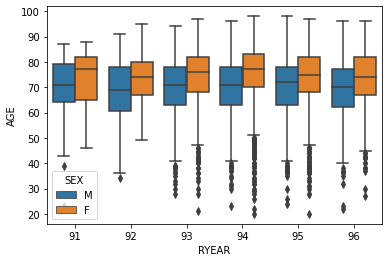

In [72]:
sns.boxplot(x = df.RYEAR, y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='RYEAR', ylabel='count'>

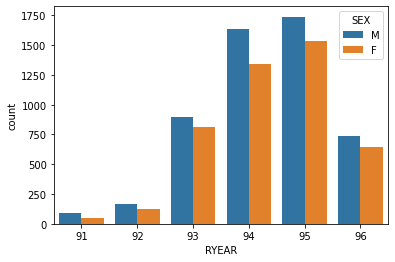

In [73]:
sns.countplot(x = df.RYEAR, hue = df.SEX)

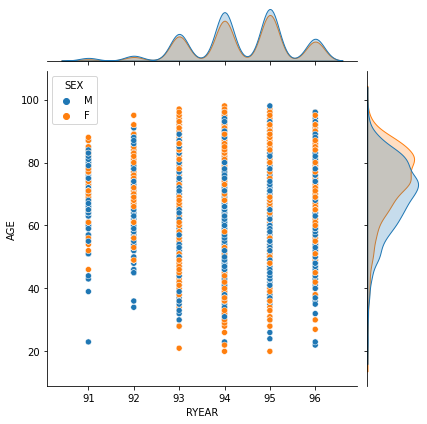

In [77]:
sns.jointplot(x = df.RYEAR, y = df.AGE, hue = df.SEX, kind = 'scatter')

<AxesSubplot:xlabel='DASP14', ylabel='count'>

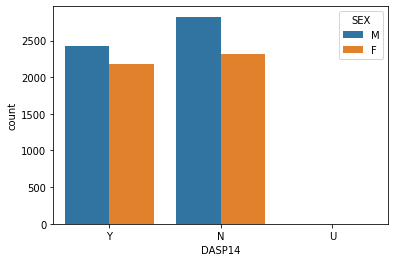

In [83]:
sns.countplot(x = df.DASP14, hue = df.SEX)

<AxesSubplot:xlabel='DASPLT', ylabel='count'>

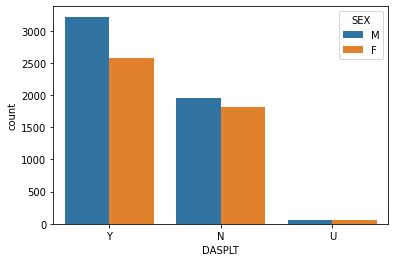

In [79]:
sns.countplot(x = df.DASPLT, hue = df.SEX)

<AxesSubplot:xlabel='DLH14', ylabel='count'>

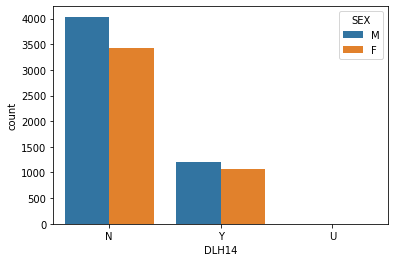

In [3]:
sns.countplot(x = df.DLH14, hue = df.SEX)

<AxesSubplot:xlabel='DMH14', ylabel='count'>

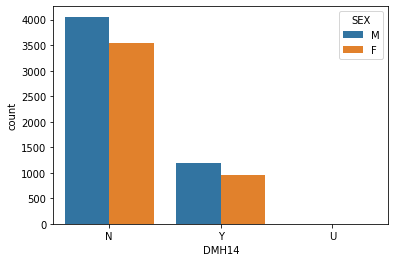

In [4]:
sns.countplot(x = df.DMH14, hue = df.SEX)

<AxesSubplot:xlabel='RXHEP14', ylabel='count'>

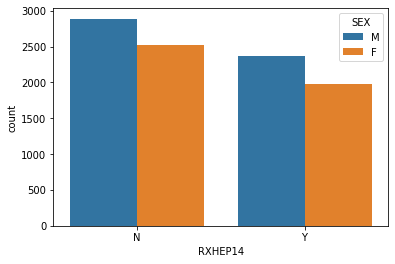

In [12]:
sns.countplot(x = df.RXHEP14, hue = df.SEX)

<AxesSubplot:xlabel='HEP14', ylabel='count'>

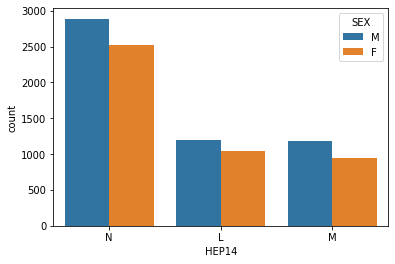

In [13]:
sns.countplot(x = df.HEP14, hue = df.SEX)

<AxesSubplot:xlabel='ONDRUG', ylabel='AGE'>

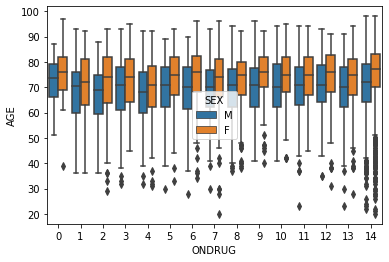

In [9]:
sns.boxplot(x = df.ONDRUG,y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='DSCH', ylabel='count'>

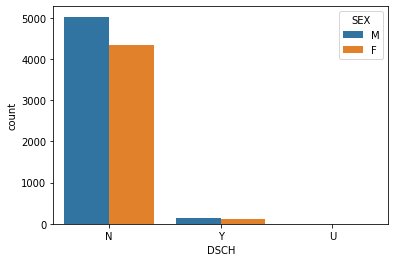

In [14]:
sns.countplot(x = df.DSCH, hue = df.SEX)

<AxesSubplot:xlabel='DAP', ylabel='count'>

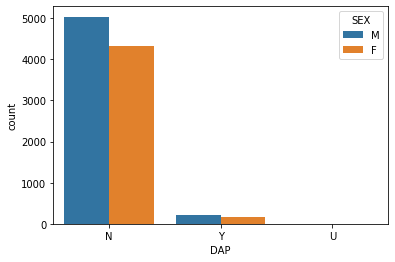

In [15]:
sns.countplot(x = df.DAP, hue = df.SEX)

<AxesSubplot:xlabel='DOAC', ylabel='count'>

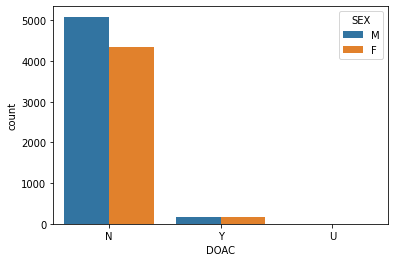

In [17]:
sns.countplot(x = df.DOAC, hue = df.SEX)

<AxesSubplot:xlabel='DGORM', ylabel='count'>

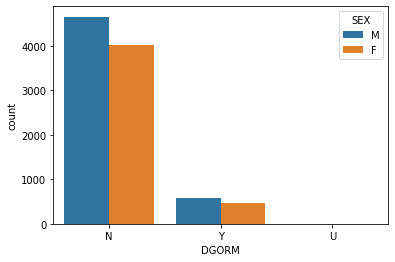

In [18]:
sns.countplot(x = df.DGORM, hue = df.SEX)

<AxesSubplot:xlabel='DSTER', ylabel='count'>

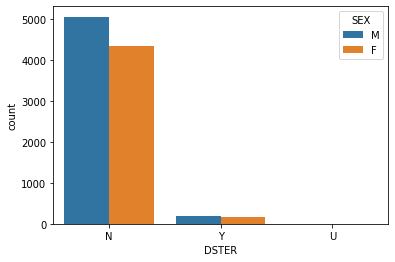

In [19]:
sns.countplot(x = df.DSTER, hue = df.SEX)

<AxesSubplot:xlabel='DCAA', ylabel='count'>

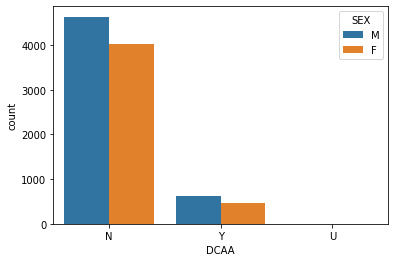

In [20]:
sns.countplot(x = df.DCAA, hue = df.SEX)

<AxesSubplot:xlabel='DMEDS', ylabel='count'>

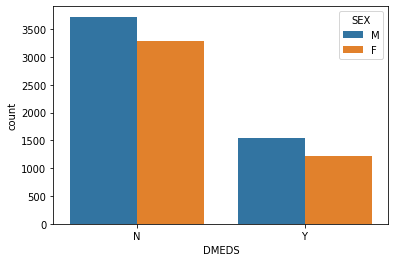

In [27]:
# combi of DSCH, DIVH, DAP, DOAC, DGORM, DSTER and DCAA
sns.countplot(x = df.DMEDS, hue = df.SEX)

<AxesSubplot:xlabel='DHAEMD', ylabel='count'>

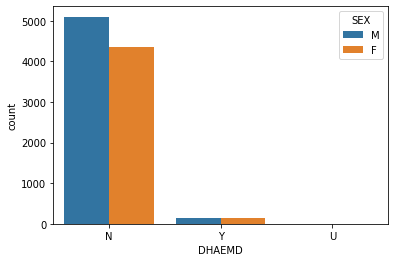

In [21]:
sns.countplot(x = df.DHAEMD, hue = df.SEX)

<AxesSubplot:xlabel='DCAREND', ylabel='count'>

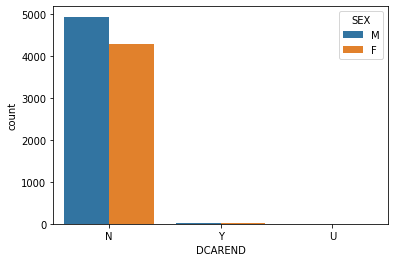

In [22]:
sns.countplot(x = df.DCAREND, hue = df.SEX)

<AxesSubplot:xlabel='DTHROMB', ylabel='count'>

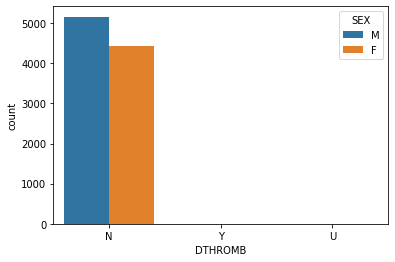

In [23]:
sns.countplot(x = df.DTHROMB, hue = df.SEX)

<AxesSubplot:xlabel='DMAJNCH', ylabel='count'>

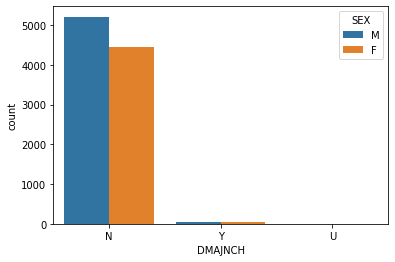

In [24]:
sns.countplot(x = df.DMAJNCH, hue = df.SEX)

<AxesSubplot:xlabel='DSIDE', ylabel='count'>

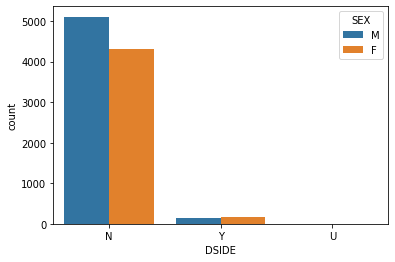

In [25]:
sns.countplot(x = df.DSIDE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DIAG'>

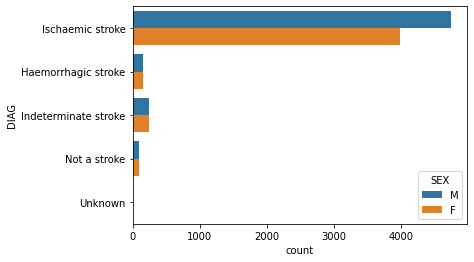

In [10]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DIAG'>

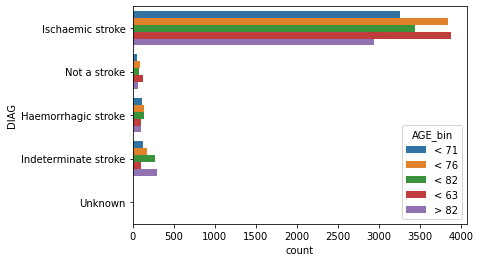

In [14]:
# combi of DDIAGISC, DDIAGHA, DDIAGUN, DNOSTRK
sns.countplot(y = df.DIAG, hue = df.AGE_bin)

<AxesSubplot:xlabel='count', ylabel='RDIAG14'>

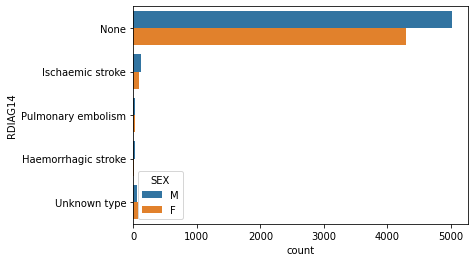

In [9]:
#combined RSISC, DRSH, DRSUNK, DPE
sns.countplot(y = df.RDIAG14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

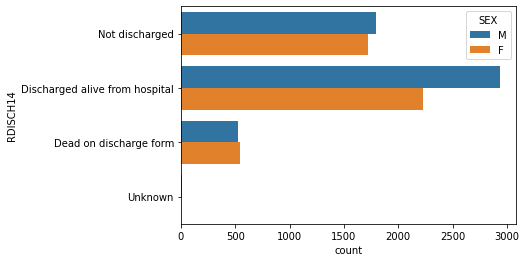

In [3]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='RDISCH14'>

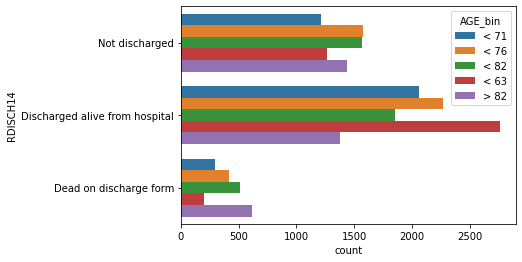

In [15]:
#combined DALIVE (Y and N) and DDEAD (Y)
sns.countplot(y = df.RDISCH14, hue = df.AGE_bin)

In [17]:
#df['DPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

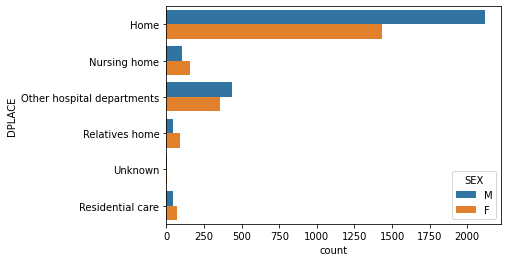

In [8]:
sns.countplot(y = df.DPLACE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DPLACE'>

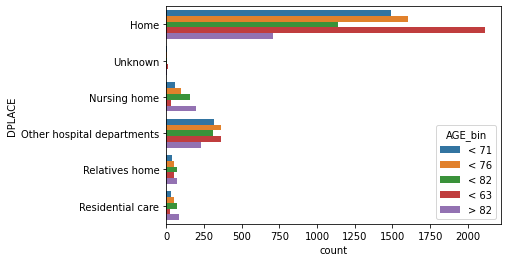

In [18]:
sns.countplot(y = df.DPLACE, hue = df.AGE_bin)

In [41]:
#df['DDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='FDEAD', ylabel='count'>

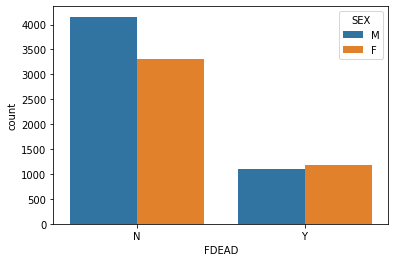

In [42]:
sns.countplot(x = df.FDEAD, hue = df.SEX)

In [24]:
#df['FDEADC'].replace({1: 'Initial Stroke', 2: 'Recurrent stroke (ischaemic or unknown)', 3: 'Recurrent stroke (haemorrhagic)', 
#4: 'Pneumonia', 5: 'Coronary heart disease', 6: 'Pulmonary embolism', 7: 'Other vascular or unknown', 8: 'Non-vascular', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

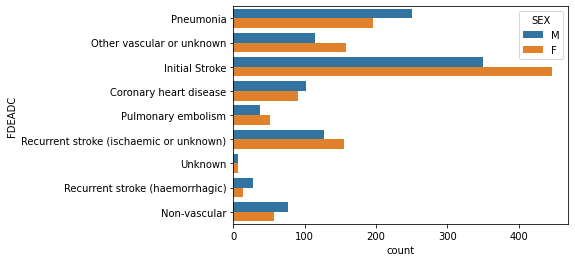

In [5]:
sns.countplot(y = df.FDEADC, hue = df.SEX)

<AxesSubplot:xlabel='TREAT14', ylabel='count'>

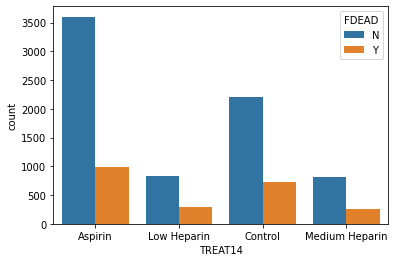

In [37]:
sns.countplot(x = df.TREAT14, hue = df.FDEAD)

In [30]:
#sns.scatterplot(x = df.TREAT14, y = df.FDEAD, hue = df.SEX)

<ipython-input-35-d0c10069c147>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


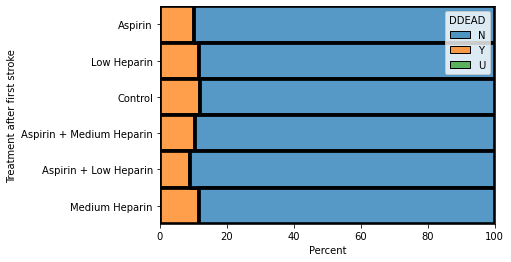

In [35]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.DDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-34-ed2ac60521f2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


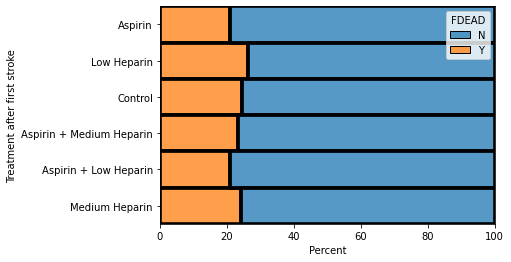

In [34]:
ax = sns.histplot(y = df.TREAT14,
                 hue= df.FDEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Treatment after first stroke")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='count', ylabel='FDEADC'>

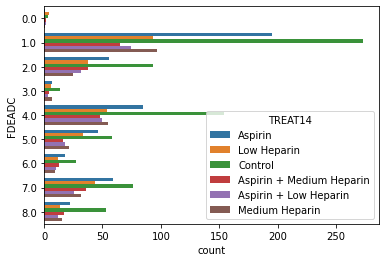

In [36]:
sns.countplot(y = df.FDEADC, hue = df.TREAT14)

<ipython-input-38-dc61f24218e7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


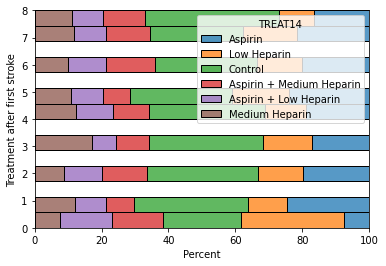

In [38]:
ax = sns.histplot(y = df.FDEADC,
                 hue= df.TREAT14,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Percent")
ax.set(ylabel="Cause of death (6 months)")

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*100]
ax.set_xticklabels(xlabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='FRECOVER', ylabel='count'>

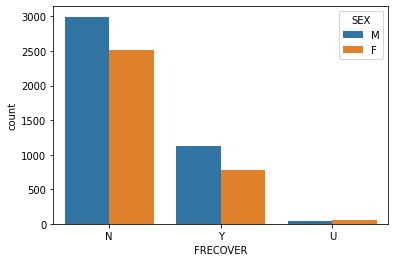

In [44]:
sns.countplot(x = df.FRECOVER, hue = df.SEX)

<AxesSubplot:xlabel='FDENNIS', ylabel='count'>

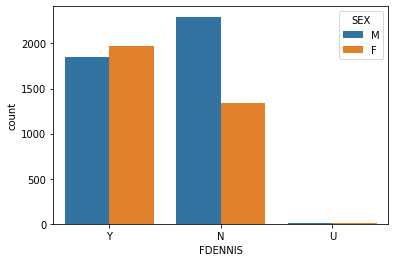

In [45]:
sns.countplot(x = df.FDENNIS, hue = df.SEX)

In [97]:
#df['FPLACE'].replace({'A': 'Home', 'B': 'Relatives home', 'C': 'Residential care', 'D': 'Nursing home', 'E': 'Other hospital departments', 'U': 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='FPLACE'>

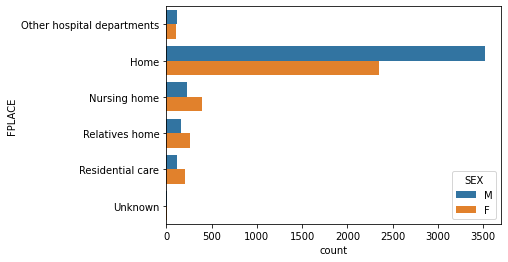

In [13]:
sns.countplot(y = df.FPLACE, hue = df.SEX)

<AxesSubplot:xlabel='FAP', ylabel='count'>

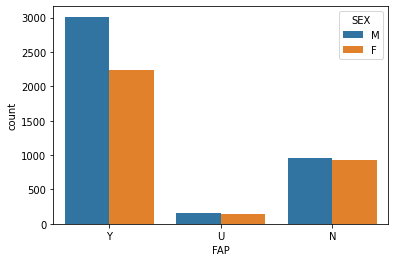

In [14]:
sns.countplot(x = df.FAP.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='FOAC', ylabel='count'>

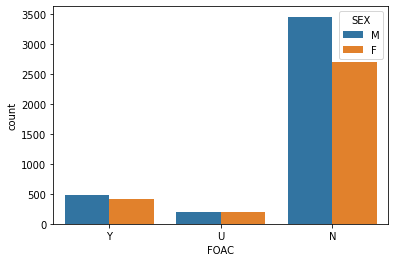

In [15]:
sns.countplot(x = df.FOAC.sort_values(ascending=False), hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='COUNTRY_ISO'>

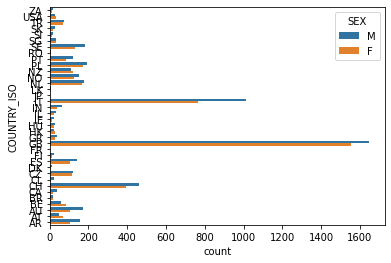

In [16]:
sns.countplot(y = df.COUNTRY_ISO.sort_values(ascending=False), hue = df.SEX)

In [90]:
#df['OCCODE'].replace({1: 'Dead', 2: 'Dependent', 3: 'Not recovered', 4: 'Recovered', 0: 'Unknown'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='OCCODE'>

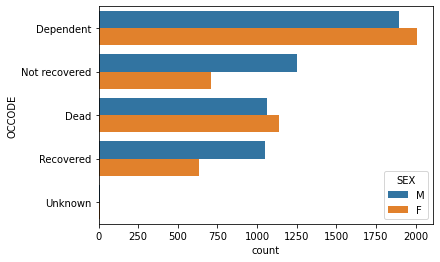

In [41]:
sns.countplot(y = df.OCCODE, hue = df.SEX)

<AxesSubplot:xlabel='OCCODE', ylabel='AGE'>

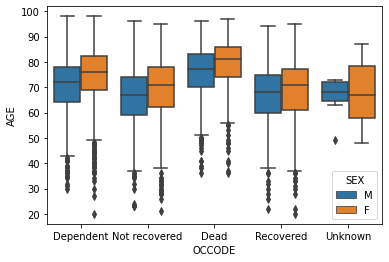

In [42]:
sns.boxplot(x = df.OCCODE, y = df.AGE, hue = df.SEX)

<AxesSubplot:xlabel='count', ylabel='DEAD'>

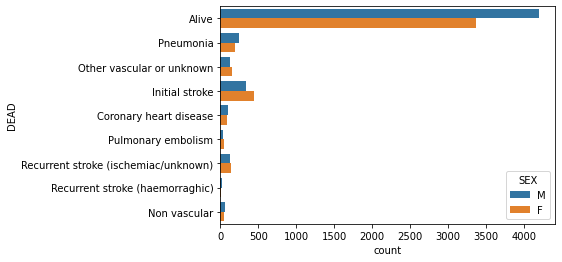

In [44]:
sns.countplot(y = df.DEAD, hue = df.SEX)

<ipython-input-50-b53a8d8b3c5e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


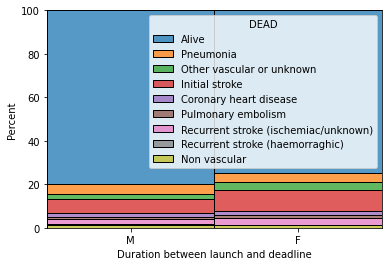

In [50]:
ax = sns.histplot(x = df.SEX,
                 hue= df.DEAD,
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['suspended', 'successful', ' live','failed', 'canceled'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [69]:
df.SEX.value_counts()
group1 = df.query('DEAD == "Alive"').groupby('DEAD')

m_count = df.SEX.value_counts()[0] # total number of male patients
f_count = df.SEX.value_counts()[1] # total number of male patients

m_alive = group1['SEX'].value_counts()[0] # number of male patients alive after 6 months
f_alive = group1['SEX'].value_counts()[1] # number of female patients alive after 6 months

print(round((m_alive / m_count * 100),2)) # percentage of male patients being alive after 6 months
print(round((f_alive / f_count * 100),2)) # percentage of male patients being alive after 6 months


79.79
74.76


In [52]:
df_dead = df.loc[df['DEAD'] != 'Alive']

<ipython-input-57-fe8725bf09ef>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


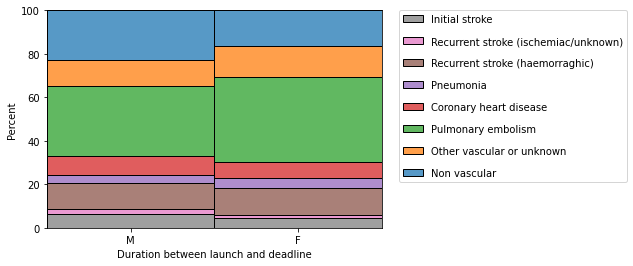

In [57]:
ax = sns.histplot(x = df_dead.SEX,
                 hue= df_dead.DEAD.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

In [105]:
df_alive = df.loc[df['DEAD'] == 'Alive']

In [94]:
df_alive.OCCODE.value_counts()

Dependent        3903
Not recovered    1960
Recovered        1680
Unknown            19
Dead                1
Name: OCCODE, dtype: int64

In [99]:
group2 = df.query('OCCODE == "Dependent"').groupby('SEX')
print(group2['FPLACE'].value_counts())


SEX  FPLACE                    
F    Home                          1151
     Nursing home                   377
     Relatives home                 171
     Residential care               167
     Other hospital departments     102
     Unknown                          7
M    Home                          1356
     Nursing home                   225
     Other hospital departments     102
     Relatives home                  97
     Residential care                77
     Unknown                          2
Name: FPLACE, dtype: int64


In [100]:
group3 = df.query('OCCODE == "Not recovered"').groupby('SEX')
print(group3['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           636
     Relatives home                  43
     Residential care                19
     Nursing home                     9
     Other hospital departments       4
M    Home                          1166
     Relatives home                  43
     Residential care                28
     Other hospital departments       7
     Nursing home                     4
     Unknown                          1
Name: FPLACE, dtype: int64


In [101]:
group4 = df.query('OCCODE == "Recovered"').groupby('SEX')
print(group4['FPLACE'].value_counts())

SEX  FPLACE                    
F    Home                           561
     Relatives home                  41
     Residential care                20
     Nursing home                     7
     Other hospital departments       1
     Unknown                          1
M    Home                          1003
     Relatives home                  21
     Residential care                17
     Other hospital departments       5
     Nursing home                     3
Name: FPLACE, dtype: int64


<ipython-input-102-68f573c18042>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


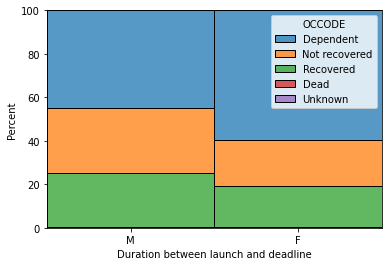

In [102]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.OCCODE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-106-6449403f472a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


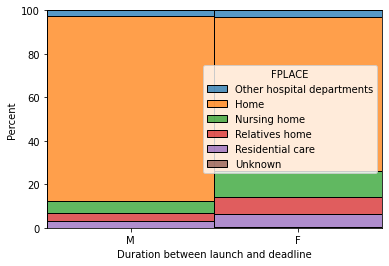

In [106]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()

<ipython-input-107-bb543009419d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


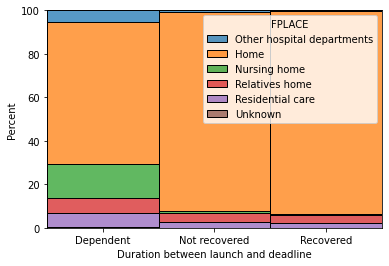

In [107]:
ax = sns.histplot(x = df_alive.OCCODE,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Duration between launch and deadline")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

#labels are nor correct!!
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
#           labels = ['Initial stroke','Recurrent stroke (ischemiac/unknown)', 'Recurrent stroke (haemorraghic)', 
#           'Pneumonia', 'Coronary heart disease', 'Pulmonary embolism', 'Other vascular or unknown', 'Non vascular'], labelspacing=1.2)

#plt.savefig("images/duration_bin_state.png", bbox_inches="tight")
plt.show()